<a href="https://colab.research.google.com/github/aTunass/Cosine_similarity/blob/main/image_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
from scipy.spatial.distance import cosine
import pickle
import os
from PIL import Image
import math
import matplotlib.pyplot as plt
# Tải mô hình VGG16 đã được huấn luyện trước
model = VGG16(weights='imagenet', include_top=False)

In [30]:
def extract_features(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))  # Đảm bảo kích thước ảnh phù hợp với mô hình VGG16
    img = img.convert("RGB")
    x = image.img_to_array(img)  # Chuyển ảnh sang numpy array
    x = np.expand_dims(x, axis=0)  # Thêm chiều batch (ví dụ: (1, 224, 224, 3))
    x = preprocess_input(x)  # Tiền xử lý dữ liệu theo yêu cầu của mô hình VGG16
    features = model.predict(x)  # Dự đoán đặc trưng của ảnh
    return features.flatten()
    #return features # Trả về vector đặc trưng 1D dùng cho cosine similarity, còn dạng 2D, tức là ko flatten thì dùng print(np.linalg.norm(cnn_features_2 - cnn_features_1, axis=1))

In [34]:
# Hàm tính khoảng cách Euclidean distance giữa hai vector đặc trưng
def euclidean_distance(feature1, feature2):
    return np.linalg.norm(feature1 - feature2)

# Tính cosine similarity giữa hai vector đặc trưng
def cosine_similarity(feature1, feature2):
    return 1 - cosine(feature1, feature2)

In [ ]:
# Dinh nghia thu muc data

data_folder = "/content/drive/MyDrive/Image _retrieval/dataset"

vectors = []
paths = []

for image_path in os.listdir(data_folder):
    # Noi full path
    image_path_full = os.path.join(data_folder, image_path)
    # Trich dac trung
    image_vector = extract_features(image_path_full, model)
    # Add dac trung va full path vao list
    vectors.append(image_vector)
    paths.append(image_path_full)

# save vao file
# vector_file = "/content/drive/MyDrive/Image _retrieval/vectors.pkl"
# path_file = "/content/drive/MyDrive/Image _retrieval/paths.pkl"

# pickle.dump(vectors, open(vector_file, "wb"))
# pickle.dump(paths, open(path_file, "wb"))

1/1 [==============================] - 1s 572ms/step


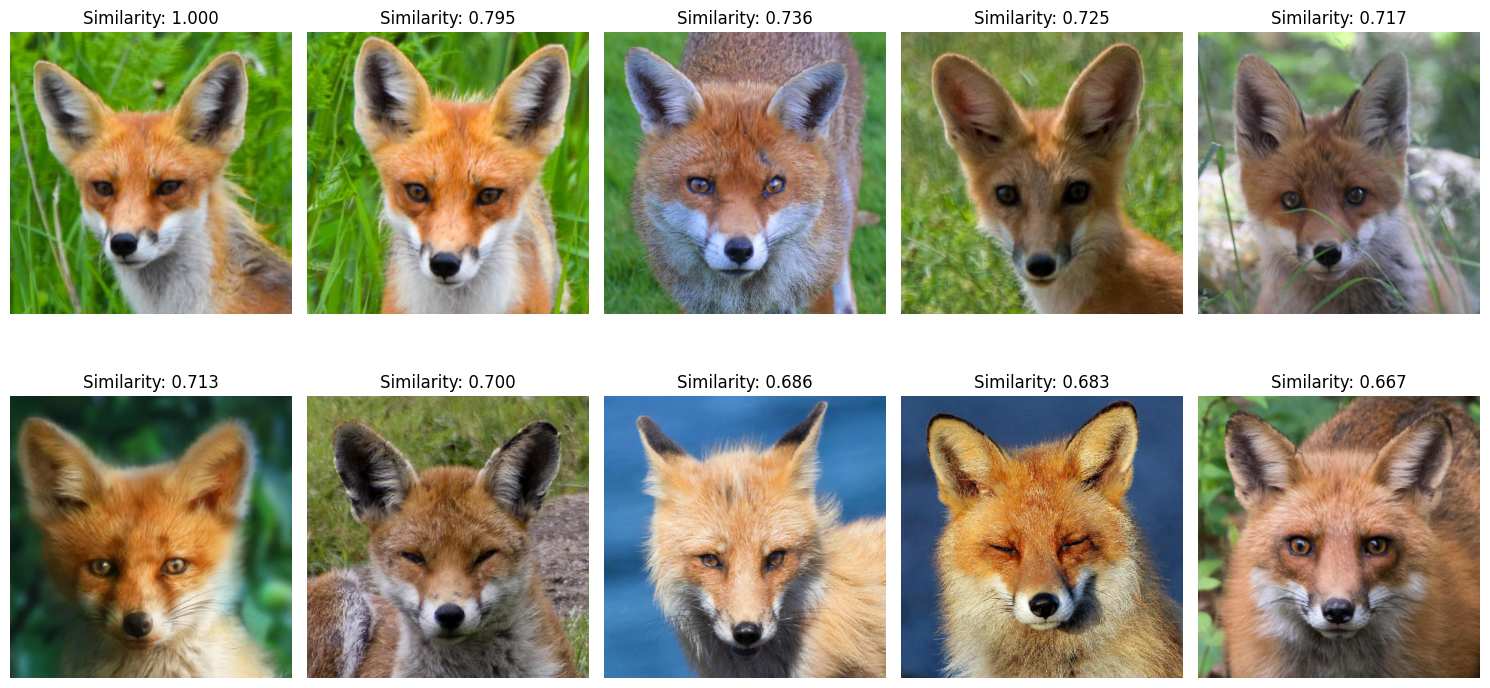

In [72]:
# Tinh khoang cach tu search_vector den tat ca cac vector
img_search_path = "/content/drive/MyDrive/Image _retrieval/dataset/4703.jpg"
search_features = extract_features(img_search_path, model)
vectors = pickle.load(open("/content/drive/MyDrive/Image _retrieval/vectors.pkl","rb"))
paths = pickle.load(open("/content/drive/MyDrive/Image _retrieval/paths.pkl","rb"))
# Tính cosine similarity giữa vector đặc trưng của ảnh tìm kiếm và các vector đặc trưng trong vectors
similarities = []
for vector in vectors:
    similarity = 1 - cosine(vector, search_features)
    similarities.append(similarity)
# Sắp xếp các ảnh theo giá trị cosine similarity giảm dần
sorted_indices = np.argsort(similarities)[::-1]  # Lấy chỉ mục sắp xếp giảm dần

# Hiển thị kết quả - 5 ảnh giống nhất
num_images_to_show = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i in range(num_images_to_show):
    img = plt.imread(paths[sorted_indices[i]])  # Lấy đường dẫn ảnh từ chỉ mục sắp xếp
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f"Similarity: {similarities[sorted_indices[i]]:.3f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 1s 1s/step


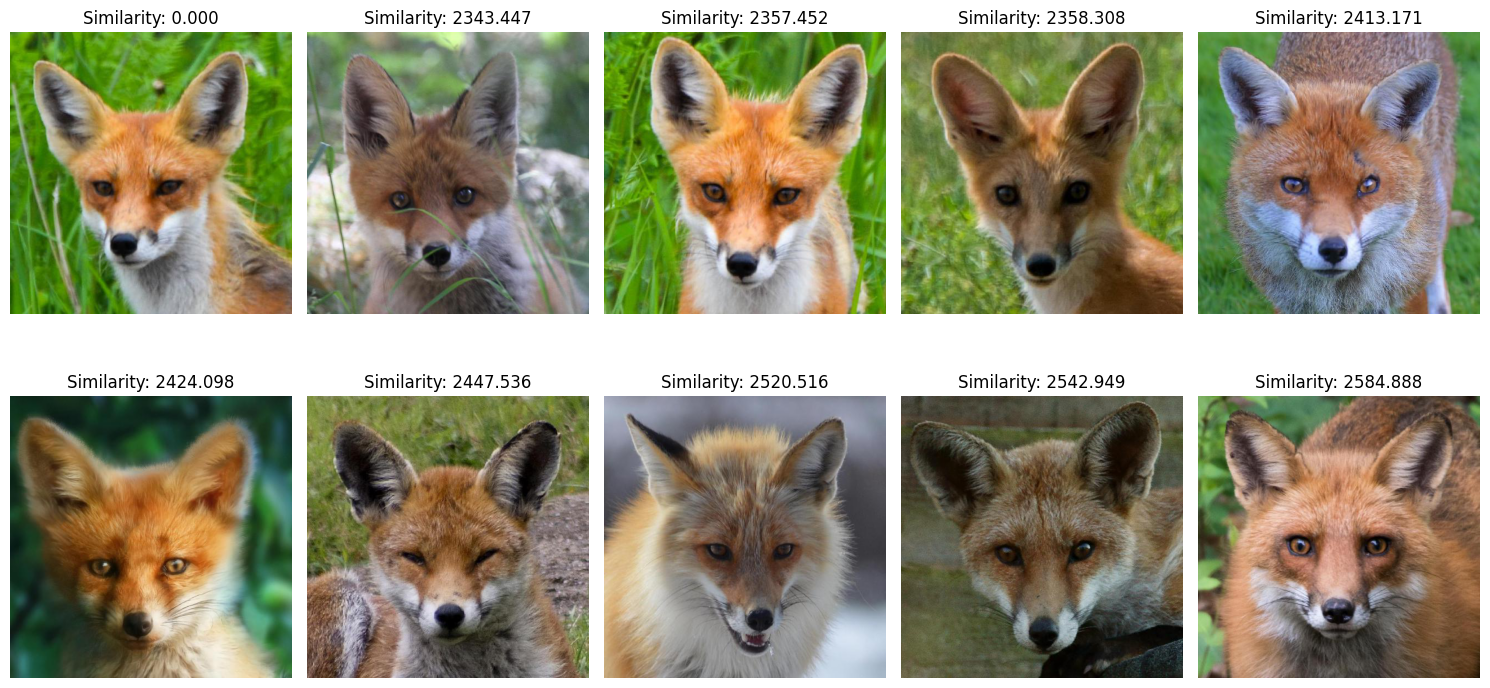

In [73]:
# Tinh khoang cach tu search_vector den tat ca cac vector
img_search_path = "/content/drive/MyDrive/Image _retrieval/dataset/4703.jpg"
search_features = extract_features(img_search_path, model)
vectors = pickle.load(open("/content/drive/MyDrive/Image _retrieval/vectors.pkl","rb"))
paths = pickle.load(open("/content/drive/MyDrive/Image _retrieval/paths.pkl","rb"))
# Tính euclidean_distance giữa vector đặc trưng của ảnh tìm kiếm và các vector đặc trưng trong vectors
similarities = []
for vector in vectors:
    similarity = euclidean_distance(vector, search_features)
    similarities.append(similarity)
# Sắp xếp các ảnh theo giá trị cosine similarity giảm dần
sorted_indices = np.argsort(similarities) # Lấy chỉ mục sắp xếp tăng dần

# Hiển thị kết quả - 5 ảnh giống nhất
num_images_to_show = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for i in range(num_images_to_show):
    img = plt.imread(paths[sorted_indices[i]])  # Lấy đường dẫn ảnh từ chỉ mục sắp xếp
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(f"Similarity: {similarities[sorted_indices[i]]:.3f}")
    ax.axis('off')

plt.tight_layout()
plt.show()

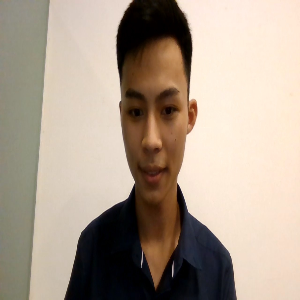

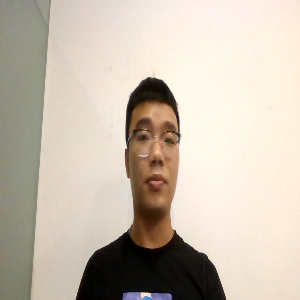

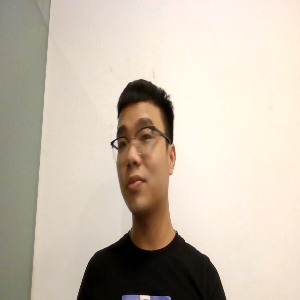

In [10]:
# read a color image
from google.colab.patches import cv2_imshow
img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/frame127.jpg')
img1 = cv2.resize(img1, (300, 300))

img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/frame79.jpg')
img2 = cv2.resize(img2, (300, 300))

img3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/image/frame90.jpg')
img3 = cv2.resize(img3, (300, 300))

# show this image
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)
img1_path = '/content/drive/MyDrive/Colab Notebooks/image/frame127.jpg'
img2_path = '/content/drive/MyDrive/Colab Notebooks/image/frame79.jpg'
img3_path = '/content/drive/MyDrive/Colab Notebooks/image/frame90.jpg'

# tính theo cosine_similarity

In [35]:
features_1 = extract_features(img1_path, model)
features_2 = extract_features(img2_path, model)
print(cosine_similarity(features_1, features_2))

1/1 [==============================] - 1s 906ms/step
0.5234156847000122


In [36]:
features_3 = extract_features(img3_path, model)
print(cosine_similarity(features_3, features_2))

1/1 [==============================] - 1s 1s/step
0.9141393303871155


# tính theo norm

In [38]:
features_1 = extract_features(img1_path, model)
features_2 = extract_features(img2_path, model)
print(euclidean_distance(features_1, features_2))

1/1 [==============================] - 1s 1s/step
918.9881


In [41]:
features_3 = extract_features(img3_path, model)
print(euclidean_distance(features_3, features_2))

1/1 [==============================] - 1s 550ms/step
346.56348
